# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fathur Rahman Al Farizy
- **Email:** fathur.alfarizy02@gmail.com
- **ID Dicoding:** fralfrzy

## Menentukan Pertanyaan Bisnis

1. Bagaimana perkembangan total penjualan seluruh produk tiap bulannya pada periode 2016-2018?
2. Kategori produk apa yang mendapatkan hasil penjualan tertinggi dan terendah selama periode 2016-2018?
3. Kategori produk apa yang mendapatkan rata-rata skor review tertinggi dan terendah dari pelanggan pada periode 2016-2018? 


## Import Semua Packages/Library yang Digunakan

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [147]:
data_dir = 'data/E-Commerce-Public-Dataset'

#### `orders_df`

In [148]:
orders_df = pd.read_csv(f'{data_dir}/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### `items_df`

In [149]:
items_df = pd.read_csv(f'{data_dir}/order_items_dataset.csv')
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### `products_df` & `product_translations_df`

In [150]:
products_df = pd.read_csv(f'{data_dir}/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [151]:
product_translations_df = pd.read_csv(f'{data_dir}/product_category_name_translation.csv')
product_translations_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [152]:
products_df = pd.merge(left=products_df, right=product_translations_df, on='product_category_name', how='left')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


#### `reviews_df`

In [153]:
reviews_df = pd.read_csv(f'{data_dir}/order_reviews_dataset.csv')
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### `payments_df`

In [154]:
payments_df = pd.read_csv(f'{data_dir}/order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Berdasarkan informasi dari dataframe di atas maka dapat ditentukan beberapa dataframe yang akan digunakan untuk masing-masing pertanyaan sebagai berikut: 
- Pertanyaan 1 : `orders_df`, `items_df`.
- Pertanyaan 2 dan 3 : `orders_df`, `items_df`, `products_df`,
- Pertanyaan 4 : `orders_df`, `items_df`, `products_df`, `reviews_df`
- Pertanyaan 5 : `orders_df`, `items_df`, `products_df`, `reviews_df`, `payments_df`

### Assessing Data

#### `orders_df`

In [155]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [156]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [157]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [158]:
orders_df.duplicated().sum()

0

#### `items_df`

In [159]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [160]:
items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [161]:
items_df.duplicated().sum()

0

In [162]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### `product_df`

In [163]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [164]:
products_df.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [165]:
products_df.duplicated().sum()

0

In [166]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### `reviews_df`

In [167]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [168]:
reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [169]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Cek Duplikat**

In [170]:
reviews_df.duplicated().sum()

0

In [171]:
reviews_group_df = reviews_df.groupby(by='order_id').agg({
    'review_id': 'nunique',
    'review_creation_date': 'nunique',
    'review_answer_timestamp': 'nunique',
    'review_score': 'nunique'
}).reset_index()

In [172]:
reviews_group_df[(reviews_group_df.review_id > 1)]

,order_id,review_id,review_creation_date,review_answer_timestamp,review_score
84,0035246a40f520710769010f752e7507,2,2,2,1
461,013056cfe49763c6f66bda03396c5ee3,2,2,2,2
556,0176a6846bcb3b0d3aa3116a9a768597,2,1,2,1
835,02355020fd0a40a0d56df9f6ff060413,2,2,2,2
985,029863af4b968de1e5d6a82782e662f5,2,2,2,2
...,...,...,...,...,...
97779,fd95ae805c63c534f1a64589e102225e,2,2,2,1
97943,fe041ba1c9f54016432fa6ee91709dbc,2,1,2,1
98480,ff763b73e473d03c321bcd5a053316e8,2,2,2,2
98497,ff850ba359507b996e8b2fbb26df8d03,2,2,2,1


Dalam 1 pesanan (*order_id*), umumnya terdapat 1 ulasan (*review_id*) oleh pelanggan. Beberapa kasus lain dijumpai lebih dari 1 ulasan yang bisa disebabkan karena beberapa faktor seperti pelanggan memperbarui ulasannya atau penjual merespon ulasan lebih dari 1 kali. Seperti pada kasus dengan jumlah *review_id*, *review_creation_date*, *review_answer_timestamp*, dan *review_score* yang bernilai 2 atau lebih.  

Berikut merupakan contoh kasus di mana pelanggan mengubah skor ulasannya pada sebuah pesanan.

In [173]:
reviews_df[reviews_df.order_id == '013056cfe49763c6f66bda03396c5ee3']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
22779,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
68633,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00


In [174]:
reviews_df[reviews_df.order_id == '8d771479430ddcc5431d2ef4aa207204']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
43728,5d4b9d006f25dbfdcb801b524747b172,8d771479430ddcc5431d2ef4aa207204,5,NaN,otima,2017-06-20 00:00:00,2017-06-21 23:01:49
73269,2486dec8ac0f7cb4d8a894cc6b3c3338,8d771479430ddcc5431d2ef4aa207204,5,NaN,NaN,2017-06-20 00:00:00,2017-06-21 23:03:26


In [175]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### `payments_df`

In [176]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [177]:
payments_df.duplicated().sum()

0

In [178]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Cleaning Data

#### `orders_df`

In [179]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


##### Perbaikan Tipe Data

In [180]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [181]:
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

##### Missing Values

In [182]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [183]:
orders_df.order_status[orders_df.isnull().any(axis=1)].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: count, dtype: int64

In [184]:
orders_df[(orders_df.order_status=='canceled') & orders_df.isnull().any(axis=1)].isnull().sum()


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64

In [185]:
canceled_orders_df = orders_df[orders_df.order_status=='canceled']

Pesanan dengan status 'canceled' yang mengandung *missing value* itu wajar dan valid.

In [186]:
orders_df[(orders_df.order_status=='unavailable') & orders_df.isnull().any(axis=1)].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

Pesanan dengan status 'unavailable' yang mengandung *missing value* selain daripada kolom `order_purchase_timestamp` dan `order_approved_at` juga wajar dan valid.

In [187]:
unavailable_orders_df = orders_df[orders_df.order_status=='unavailable']

Pesanan dengan status 'canceled' dan 'unavailable' akan dimasukkkan ke dalam kategori `failed_orders_df` atau pesanan yang gagal.

In [188]:
failed_orders_df = pd.concat([canceled_orders_df, unavailable_orders_df])
failed_orders_df.sort_index(inplace=True)

In [189]:
failed_orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [190]:
orders_df.order_status[orders_df.isnull().any(axis=1)].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: count, dtype: int64

In [191]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [192]:
orders_df[(orders_df.order_status=='created') & orders_df.isnull().any(axis=1)].isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
order_estimated_delivery_date    0
dtype: int64

Pesanan dengan status 'created' yang mengandung *missing value* selain daripada kolom `order_purchase_timestamp` juga wajar dan valid.

In [193]:
orders_df[(orders_df.order_status=='approved') & orders_df.isnull().any(axis=1)].isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    2
order_estimated_delivery_date    0
dtype: int64

In [194]:
orders_df[(orders_df.order_status=='invoiced') & orders_df.isnull().any(axis=1)].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64

In [195]:
orders_df[(orders_df.order_status=='processing') & orders_df.isnull().any(axis=1)].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64

Pesanan dengan status 'approved/invoiced/processing' yang mengandung *missing value* selain daripada kolom `order_purchase_timestamp` dan `order_approved_at` juga wajar dan valid.

In [196]:
orders_df[(orders_df.order_status=='shipped') & orders_df.isnull().any(axis=1)].isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64

Pesanan dengan status 'shipped' yang mengandung *missing value* pada kolom `order_delivered_customer_date` juga wajar dan valid.

Pesanan dengan status 'created/approved/invoiced/processing/shipped' akan dimasukkkan ke dalam kategori `in_process_orders_df` atau pesanan yang sedang diproses.

In [197]:
created_orders_df = orders_df[(orders_df.order_status=='created')]
approved_orders_df = orders_df[(orders_df.order_status=='approved')]
invoiced_orders_df = orders_df[(orders_df.order_status=='invoiced')]
processing_orders_df = orders_df[(orders_df.order_status=='processing')]
shipped_orders_df = orders_df[(orders_df.order_status=='shipped')]

In [198]:
in_process_orders_df = pd.concat([created_orders_df, approved_orders_df, invoiced_orders_df, processing_orders_df, shipped_orders_df])
in_process_orders_df.sort_index(inplace=True)

In [199]:
in_process_orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99066,46bdec7cc92d926500bee756ee1df6dc,0cfcefc0ed0af6a2e601540feeac24e7,invoiced,2018-07-16 13:20:06,2018-07-16 13:30:35,NaT,NaT,2018-08-06
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaT,NaT,2018-01-26
99181,636cdd02667dc8d76d9296bf20a6890a,c162256b133c76f79181ce61d66545db,shipped,2018-02-17 14:31:22,2018-02-20 07:11:31,2018-02-20 19:18:58,NaT,2018-03-14


In [200]:
orders_df[(orders_df.order_status=='delivered') & orders_df.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22


Pesanan dengan status 'delivered' yang mengandung *missing value* tidak wajar sehingga akan dibersihkan.

In [201]:
orders_df.drop(orders_df[(orders_df.order_status=='delivered') & orders_df.isnull().any(axis=1)].index, inplace=True)

In [202]:
orders_df[orders_df.order_status=='delivered'].isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [203]:
success_orders_df = orders_df[orders_df.order_status=='delivered']

##### Mengurutkan Data Berdasarkan Waktu Pesanan

In [204]:
orders_df.sort_values(by='order_purchase_timestamp', inplace=True)
orders_df.reset_index(drop=True, inplace=True)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
1,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
2,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
3,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25


#### `items_df`

In [205]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


##### Perbaikan Tipe Data

In [206]:
items_df.shipping_limit_date = pd.to_datetime(items_df.shipping_limit_date)

In [207]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### Duplicate Data

In [208]:
items_df.duplicated().sum()

0

In [209]:
items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

Grouping berdasarkan *order_id*

In [210]:
items_group_df = items_df.groupby(by='order_id').agg({
    'order_item_id': 'nunique',
    'product_id': 'nunique',
    'seller_id': 'nunique',
    'shipping_limit_date': 'nunique',
    'price': 'nunique',
    'freight_value': 'nunique'
}).reset_index()

items_group_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1,1,1
1,00018f77f2f0320c557190d7a144bdd3,1,1,1,1,1,1
2,000229ec398224ef6ca0657da4fc703e,1,1,1,1,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,1,1,1,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1,1,1
...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1,1,1,1,1,1
98662,fffcd46ef2263f404302a634eb57f7eb,1,1,1,1,1,1
98663,fffce4705a9662cd70adb13d4a31832d,1,1,1,1,1,1
98664,fffe18544ffabc95dfada21779c9644f,1,1,1,1,1,1


In [211]:
items_group_df[items_group_df.order_item_id > 1]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,2,1,1,1,1,1
31,00143d0f86d6fbd9f9b38ab440ac16f5,3,1,1,1,1,1
39,001ab0a7578dd66cd4b0a71f5b6e1e41,3,1,1,1,1,1
43,001d8f0e34a38c37f7dba2a37d4eba8b,2,1,1,1,1,1
69,002c9def9c9b951b1bec6d50753c9891,2,1,1,1,1,1
...,...,...,...,...,...,...,...
98603,ffd84ab39cd5e873d8dba24342e65c01,2,1,1,1,1,1
98626,ffe4b41e99d39f0b837a239110260530,2,1,1,1,1,1
98637,ffecd5a79a0084f6a592288c67e3c298,3,1,1,1,1,1
98654,fff8287bbae429a99bb7e8c21d151c41,2,1,1,1,1,1


Dalam 1 pesanan *(order_id)* bisa memiliki jumlah pesanan yang dibeli *(order_item_id)* serta jenis produknya lebih dari 1.  
Sebagai contoh berikut pesanan dengan *order_id : 0c82a229fc22597c2361656cba8d3230*

In [212]:
items_df[items_df.order_id == '0c82a229fc22597c2361656cba8d3230'].sort_values(by='order_item_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
5540,0c82a229fc22597c2361656cba8d3230,1,83e2059df06602e05d9bc1abf28166ac,334cab711dee080b079fa5779b584783,2018-05-23 16:31:58,49.0,9.02
5541,0c82a229fc22597c2361656cba8d3230,2,83e2059df06602e05d9bc1abf28166ac,334cab711dee080b079fa5779b584783,2018-05-23 16:31:58,49.0,9.02
5542,0c82a229fc22597c2361656cba8d3230,3,4006da5107400e5ac48dbcc829a36c42,3076499bbc033a927bf4a8a41bcf7fd4,2018-05-21 16:31:58,49.9,4.51
5543,0c82a229fc22597c2361656cba8d3230,4,281905b21f01db1009fd7c01b10dd1d4,eed78ac17f7f795a19a709745f00cd4e,2018-05-21 16:31:58,199.5,5.86
5544,0c82a229fc22597c2361656cba8d3230,5,3c7c75671b25b927f05e68b233263e5f,334cab711dee080b079fa5779b584783,2018-05-23 16:31:58,49.9,13.53
5545,0c82a229fc22597c2361656cba8d3230,6,3c7c75671b25b927f05e68b233263e5f,334cab711dee080b079fa5779b584783,2018-05-23 16:31:58,49.9,13.53
5546,0c82a229fc22597c2361656cba8d3230,7,3c7c75671b25b927f05e68b233263e5f,334cab711dee080b079fa5779b584783,2018-05-23 16:31:58,49.9,13.53


##### Mengurutkan Data Berdasarkan Waktu Pesanan

In [213]:
items_df.sort_values(by='shipping_limit_date', inplace=True)
items_df.reset_index(drop=True, inplace=True)
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56
1,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
2,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
3,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
4,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96


#### `product_df`

In [214]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


##### Missing Values

In [215]:
products_df.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [216]:
products_df[products_df.product_category_name.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0,NaN


In [217]:
products_df.drop(products_df[products_df.product_category_name.isnull()].index, inplace=True)

In [218]:
products_df.isna().sum()

product_id                        0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
product_category_name_english    13
dtype: int64

In [219]:
products_df.product_category_name[products_df.product_category_name_english.isnull()].value_counts()

product_category_name
portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: count, dtype: int64

**Menerjemahkan ke bahasa inggris dan menambahkan data yang kosong:**
- portateis_cozinha_e_preparadores_de_alimentos : portable_kitchen_and_food_preparers  
- pc_gamer : pc_gamer

In [220]:
products_df.loc[(products_df.product_category_name == 'portateis_cozinha_e_preparadores_de_alimentos'), 'product_category_name_english'] = 'portable_kitchen_and_food_preparers'

products_df.loc[(products_df.product_category_name == 'pc_gamer'), 'product_category_name_english'] = 'pc_gamer'

In [221]:
products_df.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

In [222]:
products_df.dropna(inplace=True)

In [223]:
products_df.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

##### Mengganti kolom 'product_category_name' dengan 'product_category_name_english''

In [224]:
products_df.drop(columns='product_category_name', inplace=True)

In [225]:
products_df.rename(columns={
    'product_category_name_english': 'product_category_name'
}, inplace=True)

In [226]:
products_df.insert(1, 'product_category_name', products_df.pop('product_category_name'))

In [227]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### `reviews_df`

In [228]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [229]:
reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

##### Duplicate Data

In [230]:
reviews_df[reviews_df.duplicated(subset=['order_id'], keep=False)].sort_values(by=['order_id','review_creation_date', 'review_answer_timestamp'], ascending=[True, False, False])

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25612,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 01:59:12
22423,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
68633,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00
22779,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
83224,d8e8c42271c8fb67b9dad95d98c8ff80,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:47
...,...,...,...,...,...,...,...
94504,c56a88a404315a0d9e412c1472dda2c4,ff763b73e473d03c321bcd5a053316e8,5,NaN,NaN,2017-11-01 00:00:00,2017-11-01 19:55:52
18783,80f25f32c00540d49d57796fb6658535,ff850ba359507b996e8b2fbb26df8d03,5,NaN,"Envio rapido, produto conforme descrito no anu...",2017-08-22 00:00:00,2017-08-25 11:40:22
41355,39de8ad3a1a494fc68cc2d5382f052f4,ff850ba359507b996e8b2fbb26df8d03,5,NaN,Envio rapido... Produto 100%,2017-08-16 00:00:00,2017-08-17 11:56:55
53962,5476dd0eaee7c4e2725cafb011aa758c,ffaabba06c9d293a3c614e0515ddbabc,3,NaN,NaN,2017-12-20 00:00:00,2017-12-21 13:24:55


In [231]:
reviews_df.sort_values(by=['order_id','review_creation_date', 'review_answer_timestamp'], ascending=[True, False, False], inplace=True)
reviews_df.drop_duplicates(subset=['order_id'], keep='first', inplace=True)

In [232]:
reviews_df[reviews_df.duplicated(subset=['order_id'], keep=False)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


##### Missing Values

In [233]:
reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87123
review_comment_message     57900
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [234]:
reviews_df.drop(columns=['review_comment_title','review_comment_message'], inplace=True)

In [235]:
reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [236]:
reviews_df

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
51963,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,2017-09-21 00:00:00,2017-09-22 10:57:03
27823,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,2017-05-13 00:00:00,2017-05-15 11:34:13
4218,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,2018-01-23 00:00:00,2018-01-23 16:06:31
38844,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,2018-08-15 00:00:00,2018-08-15 16:39:01
55676,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...
48178,9185f849f32d82e216a4e025e0c50f5c,fffc94f6ce00a00581880bf54a75a037,5,2018-05-11 00:00:00,2018-05-14 12:53:47
21684,be803f6a93d64719fd685c1cc610918a,fffcd46ef2263f404302a634eb57f7eb,5,2018-07-24 00:00:00,2018-07-25 09:25:29
37509,dbdd81cd59a1a9f94a10a990b4d48dce,fffce4705a9662cd70adb13d4a31832d,5,2017-10-29 00:00:00,2017-10-29 21:33:52
50462,fba117c9ac40d41ca7be54741f471303,fffe18544ffabc95dfada21779c9644f,5,2017-08-17 00:00:00,2017-08-18 12:24:05


#### `payments_df`

In [237]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [238]:
payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

##### Duplicate Data

In [239]:
payments_df.duplicated().sum()

0

Grouping Berdasarkan *order_id*

In [240]:
payments_group_df = payments_df.groupby(by='order_id').agg({
    'payment_sequential': 'nunique',
    'payment_type': 'nunique',
    'payment_installments': 'nunique',
    'payment_value': 'nunique'
}).reset_index()

payments_group_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1
1,00018f77f2f0320c557190d7a144bdd3,1,1,1,1
2,000229ec398224ef6ca0657da4fc703e,1,1,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,1,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1
...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1,1,1,1
99436,fffcd46ef2263f404302a634eb57f7eb,1,1,1,1
99437,fffce4705a9662cd70adb13d4a31832d,1,1,1,1
99438,fffe18544ffabc95dfada21779c9644f,1,1,1,1


In [241]:
payments_group_df[(payments_group_df.payment_sequential > 1)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
36,0016dfedd97fc2950e388d2971d718c7,2,2,2,2
73,002f19a65a2ddd70a090297872e6d64e,2,1,1,2
161,0071ee2429bc1efdc43aa3e073a5290e,2,1,1,2
215,009ac365164f8e06f59d18a08045f6c4,6,2,1,6
258,00b4a910f64f24dbcac04fe54088a443,2,2,1,2
...,...,...,...,...,...
99241,ff7400d904161b62b6e830b3988f5cbd,2,2,1,2
99293,ff978de32e717acd3b5abe1fb069d2b6,4,1,1,4
99304,ffa1dd97810de91a03abd7bd76d2fed1,2,2,1,2
99308,ffa39020fe7c8a3e907320e1bec4b985,2,2,1,2


Dalam 1 pesanan (*order_id*), pelanggan bisa melakukan transaksi dengan urutan pembayaran (*payment_sequential*) yang beragam. Jika urutan pembayarannya lebih dari 1, maka nilai pembayaran (*payment_value*) pada masing-masing urutan bisa berbeda.

Sebagai contoh pada pesanan dengan *order_id : 00c405bd71187154a7846862f585a9d4* berikut.

In [242]:
payments_df[payments_df.order_id == '00c405bd71187154a7846862f585a9d4'].sort_values(by='payment_sequential')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
67123,00c405bd71187154a7846862f585a9d4,1,credit_card,1,6.03
54653,00c405bd71187154a7846862f585a9d4,2,voucher,1,0.21
60979,00c405bd71187154a7846862f585a9d4,3,voucher,1,0.10
76930,00c405bd71187154a7846862f585a9d4,4,voucher,1,0.25
52049,00c405bd71187154a7846862f585a9d4,5,voucher,1,0.10
26391,00c405bd71187154a7846862f585a9d4,6,voucher,1,20.00
20594,00c405bd71187154a7846862f585a9d4,7,voucher,1,20.00


In [243]:
items_df[items_df.order_id == '00c405bd71187154a7846862f585a9d4']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
34554,00c405bd71187154a7846862f585a9d4,1,c4cf7c2e1f190d51517eba7e8211c8e6,f3295428338a40977a03f555246a70f4,2017-10-27 15:14:13,29.9,16.79


In [244]:
print(f"Total Harga\t\t= {29.9 + 16.79}")
print(f"Total Pembayaran\t= {(payments_df[payments_df.order_id == '00c405bd71187154a7846862f585a9d4'].payment_value.sum()):.2f}")

Total Harga		= 46.69
Total Pembayaran	= 46.69


Total harga dari pesanan tersebut adalah R$ 46.29. Harga tersebut sama dengan yang dibayarkan oleh pelanggan yaitu total penjumlahan dari kolom *payment_value*

Untuk menyederhanakan analisis, kolom yang digunakan pada `order_payments_df` hanyalah kolom *order_id* dan *payment_value*.

In [245]:
payments_df.drop(columns=['payment_sequential', 'payment_type', 'payment_installments'], inplace=True)

In [246]:
payments_df = payments_df.groupby(by='order_id').agg({
    'payment_value': 'sum'
}).reset_index()

payments_df

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


## Exploratory Data Analysis (EDA)

### `orders_df`

In [247]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
1,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
2,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
3,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25


In [248]:
orders_df.nunique()

order_id                         99418
customer_id                      99418
order_status                         8
order_purchase_timestamp         98852
order_approved_at                90725
order_delivered_carrier_date     81006
order_delivered_customer_date    95649
order_estimated_delivery_date      459
dtype: int64

In [249]:
orders_df.order_status.value_counts()

order_status
delivered      96455
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [250]:
orders_df.describe().loc[['count', 'min', 'max']]

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99418,99272,97637,96461,99418
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [251]:
print("Pesanan 2016")
print(f"Q3\t: {orders_df[orders_df.order_purchase_timestamp.dt.year==2016].order_purchase_timestamp.dt.quarter.value_counts().loc[3]}")
print(f"Q4\t: {orders_df[orders_df.order_purchase_timestamp.dt.year==2016].order_purchase_timestamp.dt.quarter.value_counts().loc[4]}")
print(f"Total\t: {orders_df[orders_df.order_purchase_timestamp.dt.year == 2016].order_id.nunique()}")

Pesanan 2016
Q3	: 4
Q4	: 325
Total	: 329


In [252]:
print("Pesanan 2017")
print(f"Q1: {orders_df[orders_df.order_purchase_timestamp.dt.year==2017].order_purchase_timestamp.dt.quarter.value_counts().loc[1]}")
print(f"Q2: {orders_df[orders_df.order_purchase_timestamp.dt.year==2017].order_purchase_timestamp.dt.quarter.value_counts().loc[2]}")
print(f"Q3: {orders_df[orders_df.order_purchase_timestamp.dt.year==2017].order_purchase_timestamp.dt.quarter.value_counts().loc[3]}")
print(f"Q4: {orders_df[orders_df.order_purchase_timestamp.dt.year==2017].order_purchase_timestamp.dt.quarter.value_counts().loc[4]}")
print(f"Total: {orders_df[orders_df.order_purchase_timestamp.dt.year == 2017].order_id.nunique()}")

Pesanan 2017
Q1: 5248
Q2: 9348
Q3: 12641
Q4: 17847
Total: 45084


In [253]:
print("Pesanan 2018")
print(f"Q1: {orders_df[orders_df.order_purchase_timestamp.dt.year==2018].order_purchase_timestamp.dt.quarter.value_counts().loc[1]}")
print(f"Q2: {orders_df[orders_df.order_purchase_timestamp.dt.year==2018].order_purchase_timestamp.dt.quarter.value_counts().loc[2]}")
print(f"Q3: {orders_df[orders_df.order_purchase_timestamp.dt.year==2018].order_purchase_timestamp.dt.quarter.value_counts().loc[3]}")
print(f"Q4: {orders_df[orders_df.order_purchase_timestamp.dt.year==2018].order_purchase_timestamp.dt.quarter.value_counts().loc[4]}")
print(f"Total: {orders_df[orders_df.order_purchase_timestamp.dt.year == 2018].order_id.nunique()}")

Pesanan 2018
Q1: 21208
Q2: 19976
Q3: 12817
Q4: 4
Total: 54005


In [254]:
print("Hari\tTotal Pesanan")
print(f"Senin\t: {orders_df.order_purchase_timestamp.dt.day_of_week.value_counts().loc[0]}")
print(f"Selasa\t: {orders_df.order_purchase_timestamp.dt.day_of_week.value_counts().loc[1]}")
print(f"Rabu\t: {orders_df.order_purchase_timestamp.dt.day_of_week.value_counts().loc[2]}")
print(f"Kamis\t: {orders_df.order_purchase_timestamp.dt.day_of_week.value_counts().loc[3]}")
print(f"Jumat\t: {orders_df.order_purchase_timestamp.dt.day_of_week.value_counts().loc[4]}")
print(f"Sabtu\t: {orders_df.order_purchase_timestamp.dt.day_of_week.value_counts().loc[5]}")
print(f"Minggu\t: {orders_df.order_purchase_timestamp.dt.day_of_week.value_counts().loc[6]}")

Hari	Total Pesanan
Senin	: 16196
Selasa	: 15962
Rabu	: 15550
Kamis	: 14758
Jumat	: 14117
Sabtu	: 10879
Minggu	: 11956


In [255]:
print("Jam\t\tTotal Pesanan")
print(f"00.00 - 06.00\t: {orders_df[((orders_df.order_purchase_timestamp.dt.hour >= 0) & (orders_df.order_purchase_timestamp.dt.hour < 6))].sort_values(by='order_purchase_timestamp').order_id.nunique()}")
print(f"06.00 - 12.00\t: {orders_df[((orders_df.order_purchase_timestamp.dt.hour >= 6) & (orders_df.order_purchase_timestamp.dt.hour < 12))].sort_values(by='order_purchase_timestamp').order_id.nunique()}")
print(f"12.00 - 18.00\t: {orders_df[((orders_df.order_purchase_timestamp.dt.hour >= 12) & (orders_df.order_purchase_timestamp.dt.hour < 18))].sort_values(by='order_purchase_timestamp').order_id.nunique()}")
print(f"18.00 - 24.00\t: {orders_df[(orders_df.order_purchase_timestamp.dt.hour >= 18)].sort_values(by='order_purchase_timestamp').order_id.nunique()}")

Jam		Total Pesanan
00.00 - 06.00	: 4739
06.00 - 12.00	: 22237
12.00 - 18.00	: 38347
18.00 - 24.00	: 34095


In [256]:
print(f"Persentase Pesanan Berhasil Terkirim: {(success_orders_df.shape[0] / orders_df.shape[0])*100:.2f}%")

Persentase Pesanan Berhasil Terkirim: 97.02%


In [257]:
success_orders_df.loc[:, 'delivery_category'] = success_orders_df.apply(
    lambda x: 'late' if x['order_delivered_customer_date'] > x['order_estimated_delivery_date'] else 'on_time',
    axis=1
)

/tmp/ipykernel_5024/910444512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_orders_df.loc[:, 'delivery_category'] = success_orders_df.apply(


In [258]:
success_orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,on_time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,on_time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,on_time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,on_time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,on_time
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,on_time
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,on_time
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,on_time
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time


In [259]:
f"Persentase Keterlambatan Pesanan: {(success_orders_df[success_orders_df.delivery_category=='late'].shape[0] / success_orders_df.shape[0])*100:.2f}%"

'Persentase Keterlambatan Pesanan: 8.11%'

### `items_df`

In [260]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56
1,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
2,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
3,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
4,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96


In [261]:
items_df.order_item_id.value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

In [262]:
items_df['total_price'] = items_df['price'] + items_df['freight_value']

In [263]:
items_df.groupby(by='seller_id').agg({
    'order_id': 'nunique',
    'product_id': 'nunique',
    'total_price': 'sum'
}).sort_values(by='total_price', ascending=False)

,order_id,product_id,total_price
seller_id,,,
4869f7a5dfa277a7dca6462dcf3b52b2,1132,95,249640.70
7c67e1448b00f6e969d365cea6b010ab,982,198,239536.44
53243585a1d6dc2643021fd1853d8905,358,23,235856.68
4a3ca9315b744ce9f8e9374361493884,1806,399,235539.96
fa1c13f2614d7b5c4749cbc52fecda94,585,289,204084.73
...,...,...,...
702835e4b785b67a084280efca355756,1,1,18.56
4965a7002cca77301c82d3f91b82e1a9,1,1,16.36
1fa2d3def6adfa70e58c276bb64fe5bb,1,1,15.90


### `orders_items_df`

In [264]:
order_items_df = pd.merge(left=success_orders_df, right=items_df, on='order_id', how='left')

In [265]:
order_items_df = pd.merge(left=order_items_df, right=payments_df, on='order_id', how='left')

In [266]:
order_items_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_category                0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_price                      0
payment_value                    3
dtype: int64

In [267]:
order_items_df.dropna(inplace=True)

In [268]:
order_items_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_category                0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_price                      0
payment_value                    0
dtype: int64

In [269]:
order_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_category,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,on_time,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,on_time,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,on_time,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,on_time,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,on_time,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62,28.62


In [270]:
order_items_df.order_item_id.value_counts().sort_index()

order_item_id
1     96454
2      9633
3      2242
4       937
5       442
6       249
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

### `order_products_df`

In [271]:
order_products_df = pd.merge(left=order_items_df, right=products_df, on='product_id', how='left')
order_products_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_category,order_item_id,...,total_price,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,on_time,1,...,38.71,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,on_time,1,...,141.46,141.46,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,on_time,1,...,179.12,179.12,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,on_time,1,...,72.20,72.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,on_time,1,...,28.62,28.62,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110165,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,on_time,1,...,195.00,195.00,baby,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
110166,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,on_time,1,...,271.01,271.01,home_appliances_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
110167,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,1,...,220.58,441.16,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
110168,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,2,...,220.58,441.16,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [272]:
order_products_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
delivery_category                   0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
total_price                         0
payment_value                       0
product_category_name            1537
product_name_lenght              1537
product_description_lenght       1537
product_photos_qty               1537
product_weight_g                 1537
product_length_cm                1537
product_height_cm                1537
product_width_cm                 1537
dtype: int64

In [273]:
order_products_df.dropna(inplace=True)

In [274]:
order_products_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_category                0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_price                      0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

### `order_reviews_df`

In [275]:
order_reviews_df = pd.merge(left=order_products_df, right=reviews_df, how='left', on='order_id')
order_reviews_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_category,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,on_time,1,...,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,on_time,1,...,178.0,1.0,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,on_time,1,...,232.0,1.0,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,on_time,1,...,468.0,3.0,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,on_time,1,...,316.0,4.0,250.0,51.0,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108628,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,on_time,1,...,828.0,4.0,4950.0,40.0,10.0,40.0,29bb71b2760d0f876dfa178a76bc4734,4.0,2018-03-01 00:00:00,2018-03-02 17:50:01
108629,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,on_time,1,...,500.0,2.0,13300.0,32.0,90.0,22.0,371579771219f6db2d830d50805977bb,5.0,2017-09-22 00:00:00,2017-09-22 23:10:57
108630,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,1,...,1893.0,1.0,6550.0,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,2018-01-26 00:00:00,2018-01-27 09:16:56
108631,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,2,...,1893.0,1.0,6550.0,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,2018-01-26 00:00:00,2018-01-27 09:16:56


In [276]:
order_reviews_df.isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
delivery_category                  0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
total_price                        0
payment_value                      0
product_category_name              0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
review_id                        815
review_score                     815
r

In [277]:
order_reviews_df.dropna(inplace=True)

In [278]:
order_reviews_df.drop(order_reviews_df[order_reviews_df.order_item_id > 1].index, inplace=True)

In [279]:
order_reviews_df.order_item_id.value_counts()

order_item_id
1    94458
Name: count, dtype: int64

In [280]:
order_reviews_df.drop(columns=['price', 'freight_value', 'total_price'], inplace=True)
order_reviews_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_category,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,on_time,1,...,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,on_time,1,...,178.0,1.0,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,on_time,1,...,232.0,1.0,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,on_time,1,...,468.0,3.0,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,on_time,1,...,316.0,4.0,250.0,51.0,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108627,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,on_time,1,...,1517.0,1.0,1175.0,22.0,13.0,18.0,e262b3f92d1ce917aa412a9406cf61a6,5.0,2017-03-22 00:00:00,2017-03-23 11:02:08
108628,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,on_time,1,...,828.0,4.0,4950.0,40.0,10.0,40.0,29bb71b2760d0f876dfa178a76bc4734,4.0,2018-03-01 00:00:00,2018-03-02 17:50:01
108629,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,on_time,1,...,500.0,2.0,13300.0,32.0,90.0,22.0,371579771219f6db2d830d50805977bb,5.0,2017-09-22 00:00:00,2017-09-22 23:10:57
108630,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,1,...,1893.0,1.0,6550.0,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,2018-01-26 00:00:00,2018-01-27 09:16:56


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan total penjualan seluruh produk tiap bulannya pada periode 2016-2018?

In [281]:
order_items_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_category,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,on_time,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,on_time,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,on_time,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,on_time,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,on_time,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110168,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,on_time,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,195.00,195.00
110169,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,on_time,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,271.01,271.01
110170,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,220.58,441.16
110171,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,220.58,441.16


In [282]:
orders = order_items_df.groupby(by='order_id').agg({
    'order_purchase_timestamp': 'first',
    'order_item_id': 'max',
    'price': 'sum',
    'freight_value': 'sum'
}).sort_values(by='order_purchase_timestamp').reset_index()

In [283]:
orders

,order_id,order_purchase_timestamp,order_item_id,price,freight_value
0,3b697a20d9e427646d92567910af6d57,2016-10-03 09:44:50,1,29.90,15.56
1,be5bc2f0da14d8071e2d45451ad119d9,2016-10-03 16:56:50,1,21.90,17.19
2,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03 21:13:36,1,36.49,17.24
3,d207cc272675637bfed0062edffd0818,2016-10-03 22:06:03,1,119.90,13.56
4,cd3b8574c82b42fc8129f6d502690c3e,2016-10-03 22:31:31,1,29.99,10.96
...,...,...,...,...,...
96449,52018484704db3661b98ce838612b507,2018-08-29 12:25:59,1,63.90,9.20
96450,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,2,418.00,92.96
96451,168626408cb32af0ffaf76711caae1dc,2018-08-29 14:18:28,1,45.90,15.39
96452,03ef5dedbe7492bdae72eec50764c43f,2018-08-29 14:52:00,1,24.90,8.33


In [284]:
orders.to_csv('dashboard/orders.csv' ,index=False)

In [285]:
monthly_orders_df = orders.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_item_id": "sum",
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_item_id": "order_count",
}, inplace=True)
monthly_orders_df

,order_date,order_count
0,2016-10,313
1,2016-11,0
2,2016-12,1
3,2017-01,911
4,2017-02,1845
5,2017-03,2897
6,2017-04,2569
7,2017-05,4003
8,2017-06,3489
9,2017-07,4416


In [286]:
monthly_orders_df.sort_values(by='order_count', ascending=False)

,order_date,order_count
13,2017-11,8474
15,2018-01,8037
17,2018-03,8017
18,2018-04,7827
19,2018-05,7810
16,2018-02,7518
22,2018-08,7142
20,2018-06,7007
21,2018-07,6960
14,2017-12,6187


In [314]:
monthly_orders_df.to_csv('dashboard/dataframe/monthly_orders.csv', index=False)

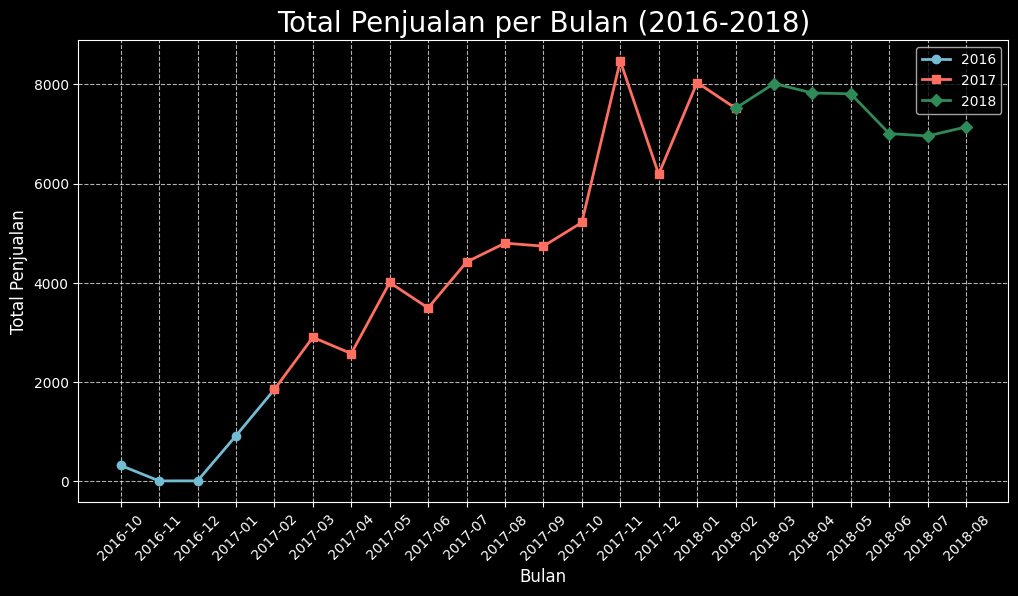

In [287]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot data untuk 2016
plt.plot(
    monthly_orders_df["order_date"][:5], 
    monthly_orders_df["order_count"][:5], 
    marker='o', linewidth=2, color="#72BCD4", label="2016"
)

# Plot data untuk 2017
plt.plot(
    monthly_orders_df["order_date"][4:17], 
    monthly_orders_df["order_count"][4:17], 
    marker='s', linewidth=2, color="#FF6F61", label="2017"
)

# Plot data untuk 2018
plt.plot(
    monthly_orders_df["order_date"][16:], 
    monthly_orders_df["order_count"][16:], 
    marker='D', linewidth=2, color="#2E8B57", label="2018"
)

# Judul dan label
plt.title("Total Penjualan per Bulan (2016-2018)", loc="center", fontsize=20)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penjualan", fontsize=12)

# Rotasi label sumbu X agar mudah dibaca
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Menampilkan legend
plt.legend()

# Menampilkan grid
plt.grid(True, linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**
- Tren penjualan dari tahun 2016 menuju tahun 2018 terlihat meningkat.
- Peningkatan penjualan paling signifikan terjadi di tahun 2017 tepatnya di bulan ke-11 (November) yakni meningkat 62,52% dari pesanan di bulan ke-10 (Oktober).
- Puncak penjualan terjadi pada tahun 2017 di bulan ke-11 yang jumlahnya mencapai 8474 pesanan.
- Penjualan pada Q1 dan Q2 di tahun 2018 cenderung stagnan.

### Pertanyaan 2: Kategori produk apa yang mendapatkan hasil penjualan tertinggi dan terendah selama periode 2016-2018?

In [288]:
order_products_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_category,order_item_id,...,total_price,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,on_time,1,...,38.71,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,on_time,1,...,141.46,141.46,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,on_time,1,...,179.12,179.12,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,on_time,1,...,72.20,72.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,on_time,1,...,28.62,28.62,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110165,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,on_time,1,...,195.00,195.00,baby,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
110166,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,on_time,1,...,271.01,271.01,home_appliances_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
110167,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,1,...,220.58,441.16,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
110168,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,2,...,220.58,441.16,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [289]:
products_counts = order_products_df.product_category_name.value_counts().reset_index()
products_counts.head()

,product_category_name,count
0,bed_bath_table,10952
1,health_beauty,9462
2,sports_leisure,8428
3,furniture_decor,8156
4,computers_accessories,7643


In [312]:
products_counts.to_csv('dashboard/dataframe/product_counts.csv')

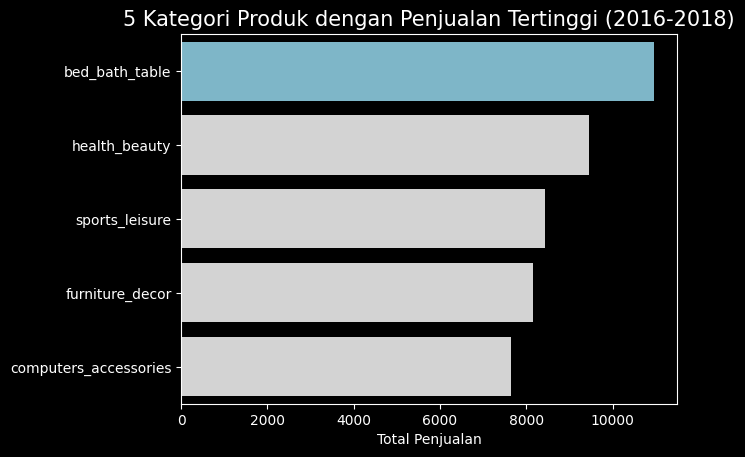

In [290]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="count", 
    y="product_category_name",
    data=products_counts.head(),
    hue="product_category_name",
    palette=colors,
    legend=False
)
plt.title("5 Kategori Produk dengan Penjualan Tertinggi (2016-2018)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('Total Penjualan')
plt.show()

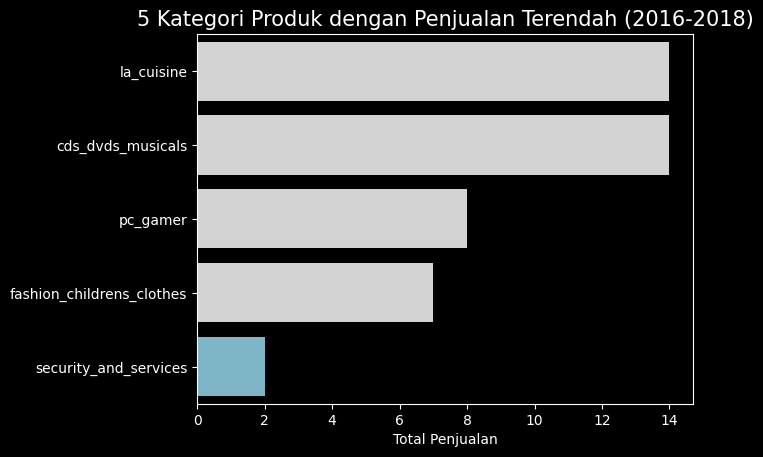

In [291]:
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

sns.barplot(
    x="count", 
    y="product_category_name",
    data=products_counts.tail(),
    hue="product_category_name",
    palette=colors,
    legend=False
)
plt.title("5 Kategori Produk dengan Penjualan Terendah (2016-2018)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('Total Penjualan')
plt.show()

**Insight:**
- Kategori produk yang mendapatkan penjualan tertinggi pada periode 2016-2018 ditempati oleh bed_bath_table.
- Kategori produk yang mendapatkan penjualan terendah pada periode 2016-2018 ditempati oleh security_and_services.

### Pertanyaan 3: Kategori produk apa yang mendapatkan rata-rata skor review tertinggi dan terendah dari pelanggan pada periode 2016-2018?

In [292]:
order_reviews_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_category,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,on_time,1,...,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,on_time,1,...,178.0,1.0,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,on_time,1,...,232.0,1.0,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,on_time,1,...,468.0,3.0,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,on_time,1,...,316.0,4.0,250.0,51.0,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108627,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,on_time,1,...,1517.0,1.0,1175.0,22.0,13.0,18.0,e262b3f92d1ce917aa412a9406cf61a6,5.0,2017-03-22 00:00:00,2017-03-23 11:02:08
108628,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,on_time,1,...,828.0,4.0,4950.0,40.0,10.0,40.0,29bb71b2760d0f876dfa178a76bc4734,4.0,2018-03-01 00:00:00,2018-03-02 17:50:01
108629,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,on_time,1,...,500.0,2.0,13300.0,32.0,90.0,22.0,371579771219f6db2d830d50805977bb,5.0,2017-09-22 00:00:00,2017-09-22 23:10:57
108630,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,on_time,1,...,1893.0,1.0,6550.0,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,2018-01-26 00:00:00,2018-01-27 09:16:56


In [293]:
product_score_df = order_reviews_df.groupby(by='product_category_name').review_score.value_counts().reset_index()
product_score_df.rename(columns={'count':'num_review_scores'}, inplace=True)
product_score_df

,product_category_name,review_score,num_review_scores
0,agro_industry_and_commerce,5.0,92
1,agro_industry_and_commerce,4.0,50
2,agro_industry_and_commerce,1.0,16
3,agro_industry_and_commerce,3.0,13
4,agro_industry_and_commerce,2.0,6
...,...,...,...
341,watches_gifts,5.0,3184
342,watches_gifts,4.0,1043
343,watches_gifts,1.0,558
344,watches_gifts,3.0,468


In [294]:
for x in product_score_df.product_category_name.unique():
    product_score_df.loc[product_score_df.product_category_name==x, 'total_reviews'] = product_score_df.loc[product_score_df.product_category_name==x, 'num_review_scores'].sum()
    product_score_df.loc[product_score_df.product_category_name==x, 'reviews_percentage'] = (product_score_df.loc[product_score_df.product_category_name==x, 'num_review_scores'] / product_score_df.loc[product_score_df.product_category_name==x, 'total_reviews'])*100

product_score_df.sort_values(by=['total_reviews', 'review_score'], ascending=[False, False], inplace=True)
product_score_df.reset_index(drop=True, inplace=True)
product_score_df

,product_category_name,review_score,num_review_scores,total_reviews,reviews_percentage
0,bed_bath_table,5.0,4922,9071.0,54.260831
1,bed_bath_table,4.0,1823,9071.0,20.097012
2,bed_bath_table,3.0,898,9071.0,9.899680
3,bed_bath_table,2.0,359,9071.0,3.957667
4,bed_bath_table,1.0,1069,9071.0,11.784809
...,...,...,...,...,...
341,pc_gamer,5.0,2,6.0,33.333333
342,pc_gamer,4.0,3,6.0,50.000000
343,pc_gamer,1.0,1,6.0,16.666667
344,security_and_services,4.0,1,2.0,50.000000


In [295]:
top_products_df = product_score_df[product_score_df.product_category_name.isin(products_counts.head(20).product_category_name)]

In [296]:
top_products_df

,product_category_name,review_score,num_review_scores,total_reviews,reviews_percentage
0,bed_bath_table,5.0,4922,9071.0,54.260831
1,bed_bath_table,4.0,1823,9071.0,20.097012
2,bed_bath_table,3.0,898,9071.0,9.899680
3,bed_bath_table,2.0,359,9071.0,3.957667
4,bed_bath_table,1.0,1069,9071.0,11.784809
...,...,...,...,...,...
95,consoles_games,5.0,594,1005.0,59.104478
96,consoles_games,4.0,196,1005.0,19.502488
97,consoles_games,3.0,105,1005.0,10.447761
98,consoles_games,2.0,27,1005.0,2.686567


In [315]:
top_products_df.to_csv('dashboard/dataframe/top_products.csv', index=False)

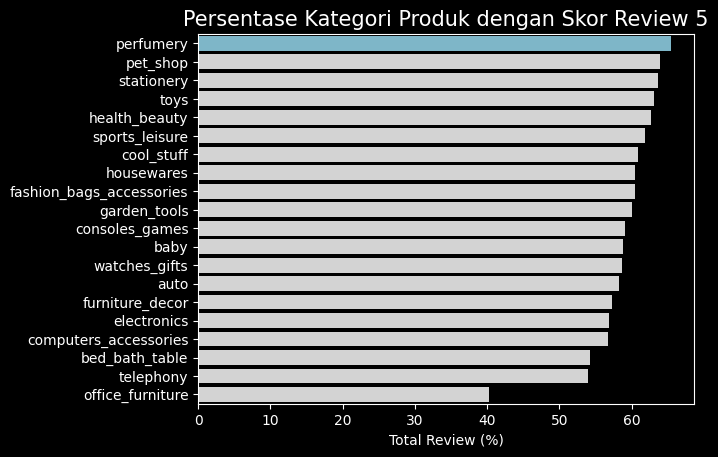

In [307]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3" ]

sns.barplot(
    x=top_products_df[top_products_df.review_score==5].sort_values(by='reviews_percentage', ascending=False).reviews_percentage, 
    y=top_products_df[top_products_df.review_score==5].sort_values(by='reviews_percentage', ascending=False).product_category_name,
    data=top_products_df[top_products_df.review_score==5].sort_values(by='reviews_percentage', ascending=False),
    hue=top_products_df[top_products_df.review_score==5].sort_values(by='reviews_percentage', ascending=False).product_category_name,
    palette=colors,
    legend=False
)

plt.title("Persentase Kategori Produk dengan Skor Review 5", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('Total Review (%)')
plt.show()

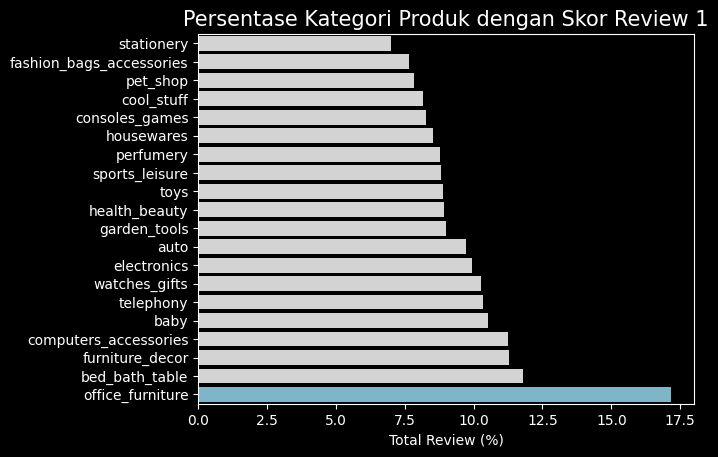

In [308]:
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

sns.barplot(
    x=top_products_df[top_products_df.review_score==1].sort_values(by='reviews_percentage').reviews_percentage, 
    y=top_products_df[top_products_df.review_score==1].sort_values(by='reviews_percentage').product_category_name,
    data=top_products_df[top_products_df.review_score==1].sort_values(by='reviews_percentage'),
    hue=top_products_df[top_products_df.review_score==1].sort_values(by='reviews_percentage').product_category_name,
    palette=colors,
    legend=False
)

plt.title("Persentase Kategori Produk dengan Skor Review 1", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('Total Review (%)')
plt.show()

**Insight:**
- Kategori produk yang mendapatkan skor review tertinggi pada periode 2016-2018 ditempati oleh perfumery.
- Kategori produk yang mendapatkan skor review terendah pada periode 2016-2018 ditempati oleh office_furniture.

## Analisis Lanjutan (Opsional)

## Conclusion

- Tren penjualan menunjukkan peningkatan dari tahun 2016 hingga 2018, dengan lonjakan paling signifikan terjadi pada bulan November tahun 2017, di mana jumlah pesanan naik 62,52% dibandingkan bulan sebelumnya, mencapai puncaknya di 8474 pesanan. Namun, setelah lonjakan tersebut, penjualan pada kuartal pertama dan kedua tahun 2018 cenderung stagnan, menunjukkan perlambatan pertumbuhan dibandingkan tren sebelumnya.
- Selama periode 2016-2018, kategori produk bed_bath_table mencatatkan penjualan tertinggi, menunjukkan tingginya permintaan di kategori ini. Sebaliknya, kategori security_and_services memiliki tingkat penjualan terendah, mengindikasikan minat pasar yang lebih kecil terhadap produk dalam kategori tersebut.
- Pada periode 2016-2018, kategori perfumery memperoleh skor review tertinggi, menunjukkan tingkat kepuasan pelanggan yang tinggi terhadap produk dalam kategori ini. Sebaliknya, kategori office_furniture mendapatkan skor review terendah, yang dapat mengindikasikan adanya ketidakpuasan pelanggan terhadap kualitas atau layanan terkait produk tersebut.